<a href="https://colab.research.google.com/github/faznafathima/Assignments/blob/main/TIMESERIES_CORRELATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES CORRELATION**


---



IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LOADING AND READING DATA

In [3]:
#reading data
df=pd.read_csv("/content/drive/MyDrive/Covid_Data - Covid_Data.csv")

In [4]:
df

,Date,Alabama,California
0,1/29/2020,0,2
1,2/5/2020,0,6
2,2/12/2020,0,8
3,2/19/2020,0,14
4,2/26/2020,0,22
...,...,...,...
139,9/28/2022,5770,33292
140,10/5/2022,4231,30884
141,10/12/2022,3589,24900
142,10/19/2022,3015,20056


DATA PRE-PROCESSING

In [5]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        144 non-null    object
 1   Alabama     144 non-null    int64 
 2   California  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [6]:
#null values
df.isnull().sum()

Date          0
Alabama       0
California    0
dtype: int64

In [7]:
#converting to date format
df['Date'] = pd.to_datetime(df.Date)

In [8]:
df["Date"]

0     2020-01-29
1     2020-02-05
2     2020-02-12
3     2020-02-19
4     2020-02-26
         ...    
139   2022-09-28
140   2022-10-05
141   2022-10-12
142   2022-10-19
143   2022-10-26
Name: Date, Length: 144, dtype: datetime64[ns]

In [9]:
df['Date'].min()

Timestamp('2020-01-29 00:00:00')

In [10]:
df['Date'].max()

Timestamp('2022-10-26 00:00:00')

In [11]:
#Now let's set the Order date column as the index column
df = df.set_index('Date')
df

,Alabama,California
Date,,
2020-01-29,0,2
2020-02-05,0,6
2020-02-12,0,8
2020-02-19,0,14
2020-02-26,0,22
...,...,...
2022-09-28,5770,33292
2022-10-05,4231,30884
2022-10-12,3589,24900


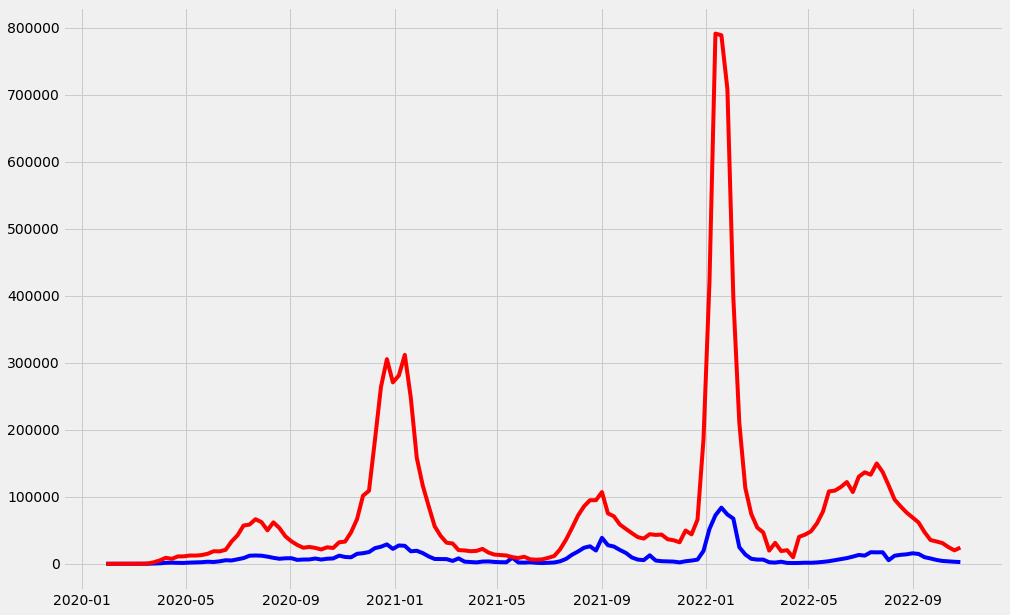

In [12]:
fig=plt.figure(figsize=(15,10))
plt.plot(df['Alabama'],label="Alabama",color="blue")
plt.plot(df['California'],label="California",color="red")

# **1. Pearson correlation**

Pandas computed Pearson r: 0.9193717114126647
Scipy computed Pearson r: 0.9193717114126654 and p-value: 2.1178412588097413e-59


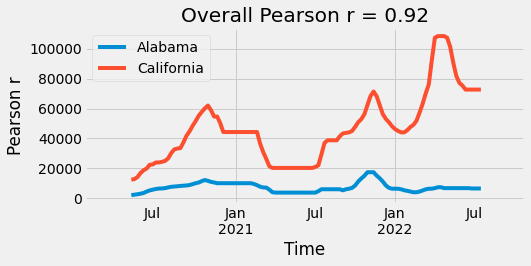

In [13]:
import scipy.stats as stats

overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(df.dropna()['Alabama'], df.dropna()['California'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

## 2. spearman correlation




In [14]:
import scipy
(scipy.stats.spearmanr(df['Alabama'], df['California'])[0])

0.8547793310550418

## 3. scatterplot for basic understanding of relations


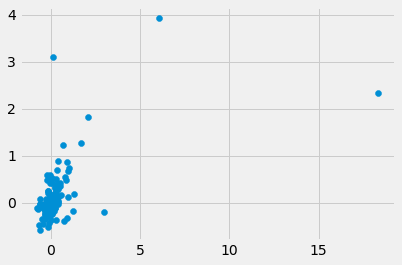

In [15]:
plt.scatter(df['Alabama'].pct_change(),df['California'].pct_change())
plt.show()



---



---

